In [1]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [6]:
training_set=train_data.flow_from_directory('/content/drive/MyDrive/DATA/TRAINING',target_size=(224,224), batch_size=32, class_mode='categorical')

Found 498 images belonging to 5 classes.


In [8]:
validation=train_data.flow_from_directory('/content/drive/MyDrive/DATA/TESTING',target_size=(224,224), batch_size=32, class_mode='categorical')

Found 498 images belonging to 5 classes.


In [9]:
training_set.class_indices

{'hoa_cuc': 0,
 'hoa_hong': 1,
 'hoa_huong_duong': 2,
 'hoa_muoi_gio': 3,
 'hoa_sen': 4}

In [10]:
validation.class_indices

{'hoa_cuc': 0,
 'hoa_hong': 1,
 'hoa_huong_duong': 2,
 'hoa_muoi_gio': 3,
 'hoa_sen': 4}

In [11]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(224,224,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
# Duỗi thẳng dữ liệu 
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(5,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                    

In [12]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(training_set,epochs=35,batch_size=128,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/35
16/16 [==============================] - 364s 22s/step - loss: 6.1904 - accuracy: 0.1928 - val_loss: 1.6094 - val_accuracy: 0.2369
Epoch 2/35
16/16 [==============================] - 19s 1s/step - loss: 1.6095 - accuracy: 0.1968 - val_loss: 1.6067 - val_accuracy: 0.2008
Epoch 3/35
16/16 [==============================] - 19s 1s/step - loss: 1.6088 - accuracy: 0.2028 - val_loss: 1.6034 - val_accuracy: 0.2490
Epoch 4/35
16/16 [==============================] - 18s 1s/step - loss: 1.5569 - accuracy: 0.2631 - val_loss: 1.5210 - val_accuracy: 0.3373
Epoch 5/35
16/16 [==============================] - 18s 1s/step - loss: 1.5315 - accuracy: 0.2912 - val_loss: 1.6101 - val_accuracy: 0.2048
Epoch 6/35
16/16 [==============================] - 18s 1s/step - loss: 1.5318 - accuracy: 0.3112 - val_loss: 1.2892 - val_accuracy: 0.4217
Epoch 7/35
16/16 [==============================] - 19s 1s/step - loss: 1.3025 - accuracy: 0.4478 - val_loss: 1.1040 - val_accuracy: 0.5843
Epoch 8/35
16/16 [

In [13]:
# Lưu 
model.save('/content/drive/MyDrive/DATA/flowers.h5')
model_1=load_model('/content/drive/MyDrive/DATA/flowers.h5')

In [14]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.11468804627656937
Train Accuracy 0.9558233022689819


<function matplotlib.pyplot.show(close=None, block=None)>

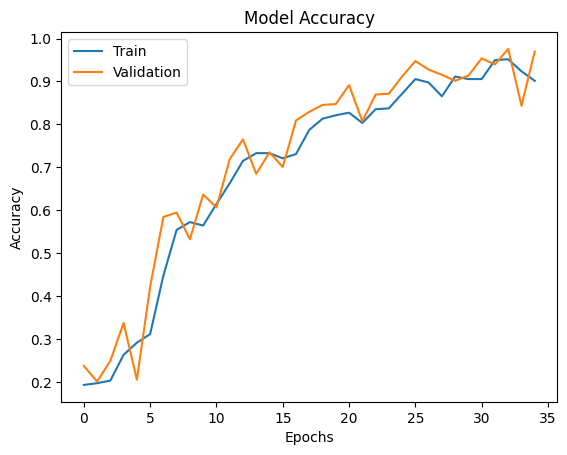

In [15]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

1/1 [==============================] - 0s 20ms/step
This picture is:  hoa_huong_duong


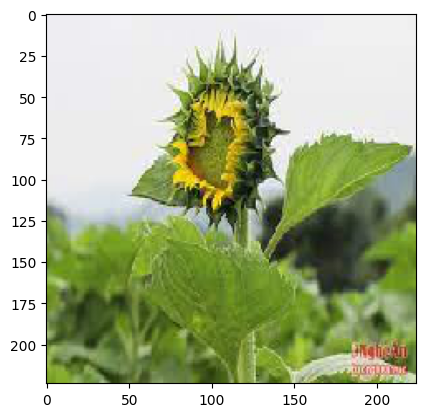

In [21]:

image = load_img('/content/drive/MyDrive/DATA/TESTING/hoa_huong_duong/hoa_huong_duong15.jpg',target_size=(224,224))
Label = ['hoa_cuc','hoa_hong','hoa_huong_duong','hoa_muoi_gio','hoa_sen']
plt.imshow(image)
image = img_to_array(image)
image = image.reshape(1,224,224,3)
image = image.astype('float32')
image = image/255
print('This picture is: ',Label[int(np.argmax(model_1.predict(image),axis=-1))])